In [1]:
import time
import numpy as np
import scipy
from numpy import *
import matplotlib.pylab as plt
# import operator
import pyscf
from pyscf import gto, scf, dft, tddft, data
import argparse

In [2]:
#np.set_printoptions (linewidth=300)

elements = ['H' , 'He', 'Li', 'Be', 'B' , 'C' , 'N' , 'O' , 'F' , 'Ne',
    'Na', 'Mg', 'Al', 'Si', 'P' , 'S' , 'Cl', 'Ar', 'K' , 'Ca',
    'Sc', 'Ti', 'V' , 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
    'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y' , 'Zr',
    'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn',
    'Sb', 'Te', 'I' , 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
    'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
    'Lu', 'Hf', 'Ta', 'W' , 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',
    'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th',
    'Pa', 'U' , 'Np', 'Pu'] 
hardness = [
0.47259288,
0.92203391,
0.17452888,
0.25700733,
0.33949086,
0.42195412,
0.50438193,
0.58691863,
0.66931351,
0.75191607,
0.17964105,
0.22157276,
0.26348578,
0.30539645,
0.34734014,
0.38924725,
0.43115670,
0.47308269,
0.17105469,
0.20276244,
0.21007322,
0.21739647,
0.22471039,
0.23201501,
0.23933969,
0.24665638,
0.25398255,
0.26128863,
0.26859476,
0.27592565,
0.30762999,
0.33931580,
0.37235985,
0.40273549,
0.43445776,
0.46611708,
0.15585079,
0.18649324,
0.19356210,
0.20063311,
0.20770522,
0.21477254,
0.22184614,
0.22891872,
0.23598621,
0.24305612,
0.25013018,
0.25719937,
0.28784780,
0.31848673,
0.34912431,
0.37976593,
0.41040808,
0.44105777,
0.05019332,
0.06762570,
0.08504445,
0.10247736,
0.11991105,
0.13732772,
0.15476297,
0.17218265,
0.18961288,
0.20704760,
0.22446752,
0.24189645,
0.25932503,
0.27676094,
0.29418231,
0.31159587,
0.32902274,
0.34592298,
0.36388048,
0.38130586,
0.39877476,
0.41614298,
0.43364510,
0.45104014,
0.46848986,
0.48584550,
0.12526730,
0.14268677,
0.16011615,
0.17755889,
0.19497557,
0.21240778,
0.07263525,
0.09422158,
0.09920295,
0.10418621,
0.14235633,
0.16394294,
0.18551941,
0.22370139]
#in Hartree
HARDNESS = dict(zip(elements,hardness))
def Hardness (atom_id):
    atom = mol.atom_pure_symbol(atom_id)
    return HARDNESS[atom]

In [3]:
# mol = gto.Mole()
# mol.build(atom = '\
# C         -3.15617        2.59898        0.79547;\
# C         -1.79169        2.11570        0.42917;\
# O         -0.80893        2.56621        0.99508;\
# H         -1.66947        1.36193       -0.34183;\
# H         -3.35300        2.38970        1.86780;\
# H         -3.91803        2.07820        0.17854;\
# H         -3.22824        3.69190        0.61449',\
# basis = 'def2-SVP')

In [4]:
# mol = gto.Mole()
# mol.build(atom = 'O         -4.89126        3.29770        0.00029;\
# H         -3.49307        3.28429       -0.00328;\
# H         -5.28213        2.58374        0.75736', basis = 'def2-SVP', symmetry = True)

In [5]:
mol = gto.Mole()
mol.build(atom = '\
C         -4.89126        3.29770        0.00029;\
O         -3.49307        3.28429       -0.00328;\
H         -5.28213        2.58374        0.75736;\
H         -5.28213        3.05494       -1.01161;\
H         -5.23998        4.31540        0.27138;\
H         -3.22959        2.35981       -0.24953',\
basis = 'def2-SVP')


In [6]:
# mol = gto.Mole()
# mol.build(atom = '\
# C         -1.44673        2.80824       -0.07813;\
# O         -1.78998        3.80792       -0.69188;\
# N         -1.18291        1.66325       -0.74926;\
# N         -1.33221        2.85136        1.26946;\
# H         -1.53168        3.72026        1.78651;\
# H         -1.04365        2.01512        1.79805;\
# H         -1.26824        1.62382       -1.77554;\
# H         -0.89270        0.81388       -0.24298'\
# , basis = 'def2-SVP')

In [84]:
mf = dft.RKS(mol) 
mf.conv_tol = 1e-9
mf.grids.level = 3     # 0-9, big number for large mesh grids, default is 3
mf.xc = 'wb97x'
mf.kernel()  #single point energy

converged SCF energy = -115.596846791624


-115.5968467916237

In [8]:
# mf = scf.RHF(mol) 
# mf.conv_tol = 1e-9
# mf.kernel()  #single point energy


In [9]:
# CIS = pyscf.tdscf.rhf.CIS(mf)
# CIS.nstates = 5
# CIS.kernel()

In [10]:
td = tddft.TDA(mf)
td.nstates = 5
start = time.time()
td.kernel()    #compute first few excited states.
end = time.time()
print ('Pyscf time =', round(end-start,4))

Excited State energies (eV)
[ 7.60448706  9.60736875  9.65608887 10.54993156 10.84667365]
Pyscf time = 5.1782


In [11]:
vind, hdiag = td.gen_vind(mf)
print (np.shape(hdiag))

(351,)


In [12]:
# mf.analyze()
#MO energies

In [13]:
#mf.mulliken_pop_meta_lowdin_ao()
#population analysis
#mf.mulliken_pop()

In [14]:
#check whether a is symmetric
# def check_symmetric(a, tol=1e-12):
#     return np.all(np.abs(a-a.T) < tol)

In [15]:
class Rectangle(object):
    

    c = 10
    
    def __init__(self, length, height):
        self.length = length
        self.height = height
        
    
    def area(self):
        self.age = 6
        self.degree = 100
#         print(self.length * self.height)
    
#     @classmethod
#     def volume(cls):
#         cls.a = 4
#         cls.b = 9
#         print(cls.c)
#         # it can create new object!

#     @classmethod
#     def kernel(cls):
# #         print(cls.length)
#         print(cls.a)
#         print(cls.length)
#         print(cls.b)
#         print(cls.c)

In [16]:
def matrix_power (S,a):
    s,ket = np.linalg.eigh(S)
    # S = mf.get_ovlp() #.get_ovlp() is basis overlap matrix
    # S = np.dot(np.linalg.inv(c.T), np.linalg.inv(c))
    # #s are eigenvalues, must be all positive
    # #each column of ket is a eigenket
    s = s**a
    X = np.linalg.multi_dot([ket,np.diag(s),ket.T])
    #X == S^1/2
    return X

def orthonormalize (C):
    X = matrix_power(mf.get_ovlp(), 0.5)
    # X = S^1/2
    C = np.dot(X,C)
    return C

print ('shape of overlap matrix', np.shape(mf.get_ovlp()))

C = mf.mo_coeff

# mf.mo_coeff is the coefficient matrix
C = orthonormalize (C)


shape of overlap matrix (48, 48)


In [17]:
total_begin = time.time()

In [18]:
Natm = mol.natm
MOe = mf.mo_energy  
#an array of MO energies, in Hartree

vind, hdiag = td.gen_vind(mf)
# vind (V) = A*V
def matrix_vector(V):
    return vind(V.T).T

mo_occ = mf.mo_occ

n_occ = len(np.where(mo_occ > 0)[0])
#mf.mo_occ is an array of occupance [2,2,2,2,2,0,0,0,0.....]
n_vir = len(np.where(mo_occ == 0)[0])

N_bf = len(mo_occ)
R = pyscf.gto.mole.inter_distance(mol, coords=None)
#Inter-particle distance array
# unit == ’Bohr’, Its value is 5.29177210903(80)×10^(−11) m
########################################################################

N_bf = mf.mo_occ.size
#number of atomic orbitals
# print('N_bf', N_bf)
R = pyscf.gto.mole.inter_distance(mol, coords=None)

# a_x = 0.38
# beta1= 1.86
# beta2=0
# alpha1= 0.9
# alpha2=0
# beta = beta1 + beta2 * a_x
# alpha = alpha1 + alpha2 * a_x

# wb97x
a_x, beta, alpha = 0.56, 8.00, 4.58

In [19]:
# creat \eta matrix
a = [Hardness(atom_id) for atom_id in range (Natm)]
a = np.asarray(a).reshape(1,-1)
eta = (a+a.T)/2

# creat GammaK and GammaK matrix
GammaJ = (R**beta + (a_x * eta)**(-beta))**(-1/beta)
GammaK = (R**alpha + eta**(-alpha)) **(-1/alpha)

Natm = mol.natm
def generateQ ():
    aoslice = mol.aoslice_by_atom()
    q = np.zeros([Natm, N_bf, N_bf])
    #N_bf is number Atomic orbitals, n_occ+n_vir, q is same size with C
    for atom_id in range (0, Natm):
        shst, shend, atstart, atend = aoslice[atom_id]
        q[atom_id,:, :] = np.dot(C[atstart:atend, :].T, C[atstart:atend, :])
    return q

q_tensors = generateQ()


q_tensor_ij = np.zeros((Natm, n_occ, n_occ))
q_tensor_ij[:,:,:] = q_tensors[:, :n_occ,:n_occ]

q_tensor_ab = np.zeros((Natm, n_vir, n_vir))
q_tensor_ab[:,:,:] = q_tensors[:, n_occ:,n_occ:]

q_tensor_ia = np.zeros((Natm, n_occ, n_vir))
q_tensor_ia[:,:,:] = q_tensors[:, :n_occ,n_occ:]


Q_K = einsum('Bjb, AB -> Ajb', q_tensor_ia, GammaK)
Q_J = einsum('Bab, AB -> Aab', q_tensor_ab, GammaJ)
# pre-calculate and store the Q-Gamma rank 3 tensor


##################################################################################################

[6.46714168 8.18163055 8.3832315  9.45187912]


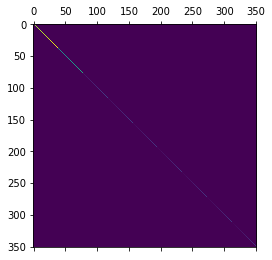

In [20]:
def iajb_fly (V):
    Q_K_V = einsum('Ajb, mjb -> Am', Q_K, V)
    iajb_V = einsum('Aia, Am -> mia', q_tensor_ia, Q_K_V)
    return iajb_V

def ijab_fly (V):
    Aab_V = einsum('Aab, mjb -> Aamj', Q_J, V)
    #('Aab, mjb -> mjaA')
    ijab_V = einsum('Aij, Aamj -> mia', q_tensor_ij, Aab_V)
    #('Aij, mjaA -> mia)
    return ijab_V

delta_diag_A = hdiag.reshape(n_occ, n_vir)

def delta_fly (V):
    delta_v = einsum('ia, mia -> mia', delta_diag_A, V)
    return delta_v

def sTDA_fly (V):
    # sTDA_A * V
    # usually V is in shape (n_occ*n_vir, -1)

    V = V.reshape(-1, n_occ, n_vir)
    # this feature can deal with multiple vectors
    sTDA_V = delta_fly (V) + 2*iajb_fly (V) - ijab_fly (V)
    sTDA_V = sTDA_V.reshape(-1,n_occ*n_vir)
    return sTDA_V

n = n_occ*n_vir
I = np.eye(n)
sTDA_A = sTDA_fly(I)

s, u = np.linalg.eigh(sTDA_A)
print(s[:4]*27.21138624598853)
plt.matshow(sTDA_A)
plt.show()




In [75]:
class Davidson(object):
    """ the general frame of Davidson """
    def setup_D(self):
        pass
    
    def scale(self):
        pass
    
    def get_initial(self):
        sort = hdiag.argsort()
        self.new_guess = np.zeros((self.A_dim, self.nstates))
#         print('initial guess shape', self.new_guess.shape)
        for i in range(self.nstates):
            self.new_guess[sort[i], i] = 1.0

    
    # orthonormalization of guess_vectors
    def Gram_Schdmit_vec(self, V, vec):
        """suppose A is orthonormalized"""
        """orthonormalize |vec> against each column of V"""
        if V.shape[0] != 0:
            vec = vec.reshape(-1,1)
            proj_coeff = np.dot(V, vec)
            vec = vec - np.dot(V.T, proj_coeff)
        return vec

    def Gram_Schdmit_fill_holder(self):
        nvec = self.new_guess.shape[1]
        #  self.new_m will real-time amount of <bra|s in V
        
        for j in range (nvec):
            vec = self.new_guess[:,j]
            vec = self.Gram_Schdmit_vec(self.V[:self.new_m,:],vec)   #single orthonormalize
            vec = self.Gram_Schdmit_vec(self.V[:self.new_m,:],vec)   #double orthonormalize
            norm = np.linalg.norm(vec)
            if  norm > 1e-14:
                vec = (vec/norm).reshape(1,-1)
                self.V[self.new_m,:] = vec
                self.new_m += 1
     
    def matrix_vector(self, X):
        return vind(X)

    def get_sub_guess(self):
        self.s, self.sub_guess = np.linalg.eigh(self.sub_A)
        # self.s is eigenvalues
        # self.sub_guess is eigenkets

    def get_full_guess(self):
        self.full_guess = np.dot(self.sub_guess[:,:self.nstates].T, self.V[:self.new_m,:]).T
       
        # full_guess is |ket>

    def get_residual(self):
#         self.residual = self.matrix_vector(self.full_guess.T).T - self.full_guess * self.s[:self.nstates]
        self.residual = np.dot(self.W[:self.new_m,:].T, self.sub_guess[:,:self.nstates]) - self.full_guess * self.s[:self.nstates]
        # residual is |ket>
    
    def get_sub_B(self):
        pass
        
    
    
    def precondition(self):
        t = 1e-14
        D = np.repeat(hdiag.reshape(-1,1), len(self.index), axis=1) - self.s[self.index]
        D = np.where(abs(D)<t, np.sign(D)*t, D)
        # if <t, then return 'np.sign(D)*t', else D (original value)
        # force all values not in domain (-t, t)
        self.new_guess = self.residual[:,self.index]/D
          
    def kernel(self, nstates=5, tol=1e-5):
        self.max = 30
        
        self.nstates = nstates
        self.tol = tol

        self.m = 0
        self.new_m = 0

        self.A_dim = n_occ * n_vir
        # currently, no basis in V

        # the first step is to add k basis into V
        # namely, the amount of initial guesses
        # new_m = min([2*k, k+8, occupied*virtual])

        self.V = np.zeros(((self.max+1)*self.nstates, self.A_dim))
        self.W = zeros_like(self.V)
        
        i_start = time.time()
        self.setup_D()
        self.get_initial()
#         print('00, m, new_m', self.m, self.new_m)
        
        i_end = time.time()
#         print("icost ", i_end - i_start)
        
        mv_cost = 0
        p_cost = 0
        G_cost = 0
        o_cost = 0
        for ii in range(self.max):
#             print("ii = ", ii)
            G_start = time.time()
            self.Gram_Schdmit_fill_holder()
            G_end = time.time()
            G_cost += G_end - G_start 
#             print('0 m, new_m', self.m, self.new_m)
            mv_start = time.time()
            self.W[self.m:self.new_m,:] = self.matrix_vector(self.V[self.m:self.new_m,:])
            mv_end = time.time()
            mv_cost += mv_end - mv_start
#             print("1shape of self.new_guess ", self.new_guess.shape)
#             print('1 m, new_m', self.m, self.new_m)
#             print("2shape of self.new_guess ", self.new_guess.shape)
            
            self.sub_A = np.dot(self.W[:self.new_m,:], self.V[:self.new_m,:].T)
            self.get_sub_B()
#             print("3shape of self.new_guess ", self.new_guess.shape)
            self.get_sub_guess()
            
#             print("4shape of self.new_guess ", self.new_guess.shape)
            self.get_full_guess()
            
#             print('5shape of self.full_guess', self.full_guess.shape)
            o_start = time.time()
            self.get_residual()
            o_end = time.time()
#             print("6shape of self.new_guess ", self.new_guess.shape)
            r_norms = np.linalg.norm(self.residual, axis=0).tolist()
            print('r norms',r_norms)
            
            o_cost += o_end - o_start
            max_norm = np.max(r_norms)
            if max_norm < self.tol:
                print ('All guesses converged!')
                break
            self.index = [r_norms.index(i) for i in r_norms if i > self.tol]
            print('self.index', self.index)
            p_start = time.time()
            self.precondition()
            p_end = time.time()
            p_cost += p_end - p_start
#             print("7shape of self.new_guess", self.new_guess.shape)
            self.m = self.new_m
        
        
        print("ii = ", ii)
#         print("G_cost ", G_cost)
#         print('mv_cost', mv_cost)
#         print("o_cost ", o_cost)
#         print('p_cost', p_cost)
#         print(self.s[:self.nstates]*27.21138624598853)   
#         27.211386245988 https://physics.nist.gov/cgi-bin/cuu/Value?hrev|search_for=hartree
        if hasattr(self, 's'):
            print(self.s[:self.nstates]*27.211386031943245)# this unit converting is much closer!!!
            return self.s[:self.nstates], self.full_guess
        else:
            self.scale()
            return self.full_guess

In [76]:
class sTDA_prec(Davidson):

    def __init__(self, eigen_la, B):
        self.eigen_la = eigen_la
            
        self.bnorm = np.linalg.norm(B, axis=0, keepdims = True)
        #norm of each vectors in B, shape (1,-1)
        
        self.B = B/self.bnorm
    
    def setup_D(self):
        
        N_rows = np.shape(self.B)[0]
        self.B = self.B.reshape(N_rows, -1)
        N_vectors = np.shape(self.B)[1]
        self.tol = 1e-2
        
        t = 1e-10
        D = np.repeat(hdiag.reshape(-1,1), N_vectors, axis=1) - self.eigen_la
        D = np.where(abs(D)<t, np.sign(D)*t, D) # <t: returns np.sign(D)*t; else: D
        self.inv_D = 1/D
        
    
    def get_initial(self):
        self.new_guess = self.B * self.inv_D
    
    def matrix_vector(self, X):
        return sTDA_fly(X)
    
    def precondition(self):
        self.new_guess = self.residual[:,self.index] * self.inv_D[:,self.index]
        
    def get_sub_B(self):
        self.sub_B = np.dot(self.V[:self.new_m, :], self.B)
        
    def get_sub_guess(self):
        # AX - Xeigen_la  = B
        N_vectors = len(self.eigen_la)
        a, u = np.linalg.eigh(self.sub_A)
        ub = np.dot(u.T, self.sub_B)
        ux = np.zeros_like(self.sub_B)
        for k in range(N_vectors):
            ux[:, k] = ub[:, k]/(a - self.eigen_la[k])
        self.sub_guess = np.dot(u, ux)
        
    def get_residual(self):
        self.residual = np.dot(self.W[:self.new_m, :].T, self.sub_guess) - self.full_guess * self.eigen_la - self.B
        
        
    def scale(self):
        self.full_guess = self.full_guess * self.bnorm
        


In [77]:
class Davidson_p_sTDA(Davidson):
    
    def precondition(self):
        self.new_guess = sTDA_prec(self.s[self.index], self.residual[:,self.index]).kernel()
        
        

In [78]:
result = sTDA_prec([6.46714168,8.18163055,8.3832315],np.random.rand(351,3)).kernel()


r norms [0.2541255441675327, 0.0949599082334803, 0.12845335921232787]
self.index [0, 1, 2]
r norms [0.030759293560356112, 0.0018422298262628027, 0.0024232481390696033]
self.index [0]
r norms [0.005847153973591403, 0.001954482731935165, 0.007383573489466294]
All guesses converged!
ii =  2


In [79]:
p_sTDA = Davidson_p_sTDA()

start = time.time()
p_sTDA.kernel()
end = time.time()
print('time =', end-start)

r norms [0.06253949269151338, 0.04935058759405762, 0.07799695254034207, 0.04462766638529374, 0.09431800496070981]
self.index [0, 1, 2, 3, 4]
r norms [0.3094067991886459, 0.3547109789272382, 0.4266057429398744, 0.28737323673572157, 0.40509971108224324]
self.index [0, 1, 2, 3, 4]
r norms [0.12804812798731113, 0.329201308193924, 0.4979524442193667, 0.9592220543758737, 15.676062619161677]
self.index [0, 1, 2, 3, 4]
r norms [1.0104913217279785, 0.34919248004911846, 4.164706323555166, 59.958921361193546, 1.1838082813312667]
self.index [0, 1, 2, 3, 4]
r norms [0.08250174513509477, 0.4287631863767634, 0.5986089880208001, 1.2114180494931395, 1.8933850142652955]
self.index [0, 1, 2, 3, 4]
r norms [0.04708635079437153, 0.09867655764336684, 0.6752963495975502, 1.6767712020612784, 0.9021771291240509]
self.index [0, 1, 2, 3, 4]
r norms [0.02194272676996452, 11.392854026498686, 0.7030534362259451, 26.366309390305336, 0.6930281792582917]
self.index [0, 1, 2, 3, 4]
r norms [0.00775703569757169, 0.08558

r norms [3.884443967302033e-06, 0.0013473974980125502, 1.267023552414092e-06, 4.919763872387177e-05, 0.00033177295326926564]
self.index [1, 3, 4]
r norms [0.2755325405421998, 0.27560773679709283, 0.32941409348635836]
self.index [0, 1, 2]
r norms [0.15801365339426465, 0.10626285317183339, 0.26499402609773176]
self.index [0, 1, 2]
r norms [0.09232054578946368, 0.7083091745767016, 0.3478338624425463]
self.index [0, 1, 2]
r norms [0.22138984674992443, 0.04480394809142532, 0.3220715643672663]
self.index [0, 1, 2]
r norms [1.8021447886612945, 0.09884105880921076, 0.12922363155728825]
self.index [0, 1, 2]
r norms [0.19433080513308024, 0.09727018536551967, 0.12136105748998652]
self.index [0, 1, 2]
r norms [0.17976380720924764, 0.03907004446134458, 0.10711179806384931]
self.index [0, 1, 2]
r norms [0.42553825711109383, 0.04029509543627668, 0.031884102889438694]
self.index [0, 1, 2]
r norms [0.06909696600089424, 0.009080845017384733, 0.010528210755271628]
self.index [0, 2]
r norms [0.04533156631

In [80]:
a = Davidson()
a.nstates = 5
b = time.time()
a.kernel()
e = time.time()
print('time =', e-b)

r norms [0.06253949269151338, 0.04935058759405762, 0.07799695254034207, 0.04462766638529374, 0.09431800496070981]
self.index [0, 1, 2, 3, 4]
r norms [0.020287838902830424, 0.01501546438195711, 0.03291607646520453, 0.01224670075298954, 0.02491420710309575]
self.index [0, 1, 2, 3, 4]
r norms [0.0031948562589936024, 0.015520240917591363, 0.006190099906518566, 0.01581627179086854, 0.009899978693477704]
self.index [0, 1, 2, 3, 4]
r norms [0.0006415302135526909, 0.009008374952898173, 0.0017496078001537447, 0.008123413242139405, 0.005749972954092483]
self.index [0, 1, 2, 3, 4]
r norms [0.0001764773799831265, 0.00442714521810677, 0.00041041651982414145, 0.004073283161484904, 0.0020313807927332247]
self.index [0, 1, 2, 3, 4]
r norms [3.600175475628768e-05, 0.0010236214550330075, 9.63793160225989e-05, 0.0015670828573292768, 0.0009518424123647994]
self.index [0, 1, 2, 3, 4]
r norms [6.245470375743961e-06, 0.0003771139067481623, 1.5204650682092778e-05, 0.0005130865182193305, 0.00032938111329585795

In [ ]:
# b = time.time()
# td.nstates = 5
# td.conv_tol = 1e-10
# td.verbose = 4
# td.kernel()
# e = time.time()
# print('time =', e-b)

In [ ]:
class Davidson_sTDA_mv(Davidson):
    def matrix_vector(self, X):
        return sTDA_fly(X)

Davidson_sTDA_mv = Davidson_sTDA_mv()   
Davidson_sTDA_mv.kernel()

# #or:
# Davidson0 = Davidson()
# Davidson0.matrix_vector = sTDA_fly
# Davidson0.kernel()

In [ ]:
class Davidson_i_sTDA(Davidson):
    def initial(self):
        eigenvalues, self.new_guess = Davidson_sTDA_mv.kernel()
Davidson_isip = Davidson_i_sTDA()
Davidson_isip.kernel()
# standard: [ 7.60448706  9.60736875  9.65608887 10.54993156 10.84667365]

In [ ]:
# def A_diag_preconditioner (residual, sub_eigenvalue):
#     # preconditioners for each corresponding residual
#     k = np.shape(residual)[1]
#     zz = 1e-14
#     D = np.zeros((n, k))
#     for i in range (0, k):
#         D[:,i] = hdiag - sub_eigenvalue[i]
#         D[:,i][(D[:,i]<zz)&(D[:,i]>=0)] = zz
#         D[:,i][(D[:,i]>-zz)&(D[:,i]<0)] = -zz
#     new_guess = residual/D
#     return new_guess

In [ ]:
# ################################################################################
# # original Davidson, to solve eigenvalues and eigenkets of sTDA_A matrix
# def Davidson (k):
#     tol = 1e-5 # Convergence tolerance
#     n = occupied*virtual # size of sTDA_A matrix
#     max = 30
#     #################################################
#     # generate initial guess
#     # m is size of subspace
#     m = min([2*k, k+8, occupied*virtual])
#     # a container to hold guess vectors
#     V = np.zeros((n, 30*k))
#     W = np.zeros((n, 30*k))
    
#     # positions of hdiag with lowest values set as 1
#     # hdiag is non-interactiong A matrix
#     sort = hdiag.argsort()
#     for j in range(0,m):
#         V[int(np.argwhere(sort == j)), j] = 1

#     W[:, :m] = sTDA_fly(V[:, :m])
#     #generate initial guess and put in holders V and W
    
#     ###########################################################################################
#     for i in range(0, max):
#         # sub_A is subspace A matrix
#         sub_A = np.dot(V[:,:m].T, W[:,:m])
#         sub_eigenvalue, sub_eigenket = np.linalg.eigh(sub_A)
#         # Diagonalize the subspace Hamiltonian, and sorted.
#         #sub_eigenvalue[:k] are smallest k eigenvalues
#         residual = np.dot(W[:,:m], sub_eigenket[:,:k]) - np.dot(V[:,:m], sub_eigenket[:,:k] * sub_eigenvalue[:k])
# #         print ('shape of residual', np.shape(residual))
#         Norms_of_r = np.linalg.norm (residual, axis=0, keepdims = True)

#         # largest residaul norm
#         max_norm = np.max(Norms_of_r)

#         if max_norm < tol:
#             break

#         # index for unconverged residuals
#         index = [i for i in range(np.shape(Norms_of_r)[1]) if Norms_of_r[0,i] > tol]
     
#         ########################################
#         # preconditioning step
#         # only generate new guess from unconverged residuals
#         new_guess = A_diag_preconditioner (residual[:,index], sub_eigenvalue[:k][index])

#         # orthonormalize the new guesses against old guesses
#         # and put into V holder
#         V, new_m = Gram_Schdmit_fill_holder (V, m, new_guess)
#         W[:, m:new_m] = sTDA_fly (V[:, m:new_m])
#         m = new_m
#     ###########################################################################################
#     full_guess = np.dot(V[:,:m], sub_eigenket[:, :k])

#     print ('Iteration steps =', i+1)
#     print ('Final subspace size = ', np.shape(sub_A))
#     # print ('Davidson time:', round(end-start,4))

#     return (sub_eigenvalue[:k]*27.21138624598853, full_guess)
# ###########################################################################################

In [ ]:
# energies, kets = Davidson(4)
# print (energies)

# [12.2388045  13.59944497 13.79151538 15.04073066 15.10727607 15.24503727
#  16.45336705 16.51809479 16.8506097  17.3015488 ]

In [ ]:
# def orthonormalize (v1, v2):
# #     v1 = v1/np.linalg.norm(v1)
#     v2 = v2 - (np.dot(v1, v2) / np.dot(v1, v1)) * v1
# #     v2 = v2 - np.dot(v1, v2) * v1
#     v2 = v2/np.linalg.norm(v2)
#     return v2

In [ ]:
# # suppose a has N columns
# #a[:, :n] means the first n columns
# #a[:, n:] means "except" the first n columns

# #a[:, -n:] means the last n columns
# #a[:, :-n] means the firts (N-n) columns, or "except" the last n columns

# #a[:, n:m] measn from index(n) column to index(m-1) columns

In [ ]:
# def Gram_Schdmit_append (A, B):
#     # A_I*P, B_I*Q
#     # suppose A is already orthonormalized
#     # append B to A, and orthonormalize matrix B against A, 
    
#     A_vectors = np.shape(A)[1]
#     B_vectors = np.shape(B)[1]
    
#     C = np.append (A, B, axis=1)
    
#     for j in range (0, B_vectors):
#         bvec = B[:,j]
#         bvec = Gram_Schdmit_bvec (C[:, :A_vectors + j], B[:,j])
#         C[:, A_vectors + j] = bvec/np.linalg.norm(bvec)
#     return C

In [ ]:
# def Gram_Schdmit_against (A, B):
#     # suppose A is already orthonormalized
#     # orthonormalize vectors in B against A, as well as B it self
  
#     A_vectors = np.shape(A)[1]
#     B_vectors = np.shape(B)[1]

#     for j in range (0, B_vectors):
#         bvec = B[:,j] 
#         bvec = Gram_Schdmit_bvec (A, bvec)
#         if np.linalg.norm(bvec) < 1e-7:
#             index.append(j)
#         else:
#             B[:,j] = bvec/np.linalg.norm(bvec)
# #     print (type(index)) #list
# #     print (index)

#     B = np.delete(B, index, axis=1)
        
#     B = Gram_Schdmit (B)
# #     print (np.shape(B))
#     return B

In [ ]:
# # iajb_v = np.einsum('Aia, Bjb, AB, jbm -> iam', q_tensor_ia, q_tensor_ia, GammaK, V)

# # ijab_v = np.einsum('Aij, Bab, AB, jbm -> iam', q_tensor_ij, q_tensor_ab, GammaJ, V)


# def iajb_fly (V):
#     V = V.reshape(n_occ, n_vir, -1)
#     Q_K_V = np.einsum('Ajb, jbm -> Am', Q_K, V)
#     iajb_V = np.einsum('Aia, Am -> iam', q_tensor_ia, Q_K_V).reshape(n_occ*n_vir, -1)
# #     print('iajb done')
#     return iajb_V

# def ijab_fly (V):
#     V = V.reshape(n_occ, n_vir, -1)
# #     ijab_v = np.einsum('Aij, Aab, jbm -> iam', q_tensor_ij, Q_J,  V)

#     Aij_V = np.einsum('Aij, jbm -> Aibm', q_tensor_ij, V)
#     ijab_V = np.einsum('Aab, Aibm -> iam', Q_J, Aij_V).reshape(n_occ*n_vir, -1)

# #     print ('ijab done')
# #     Aab_V = np.einsum('Aab, jbm -> jAam', Q_J, V)
# #     ijab_V = np.einsum('Aij, jAam -> iam', q_tensor_ij, Aab_V).reshape(n_occ*n_vir, -1)
#     return ijab_V

# delta_diag_A = hdiag.reshape(n_occ, n_vir)


# def delta_fly (V):
#     V = V.reshape(n_occ, n_vir, -1)
# #     print ('Shape of V = ', np.shape(V))
#     #delta_v = np.einsum('ij,ab,ia,jb -> ia',delta_ij,delta_ab,delta_diag_A, v)
#     delta_v = np.einsum('ia,iam -> iam', delta_diag_A, V).reshape(n_occ*n_vir, -1)
#     return delta_v

# def sTDA_fly (V):
#     V = V.reshape(n_occ*n_vir,-1)
#     # -1 means shape of first dimension is not asigned, but can be inferred with the rest dimension
#     # this feature can deal with multiple vectors
#     sTDA_V =  delta_fly (V) + 2*iajb_fly (V) - ijab_fly (V)
# #     sTDA_V = sTDA_V.reshape(n_occ*n_vir, -1)
# #     print (np.shape(sTDA_v))
#     return sTDA_V

# n = occupied * virtual
# I = np.eye(n)

# start = time.time()
# sTDA_B = sTDA_fly (I)
# end = time.time()  



# s,k = np.linalg.eigh(sTDA_B)
# print (s[:10]*27.21138624598853)


# plt.matshow(sTDA_B)
# plt.show()


In [ ]:
# def check_orthonormal (A):
#     n = np.shape(A)[1]
#     B = np.dot (A.T, A)
#     c = np.linalg.norm(B - np.eye(n))
#     return c

In [ ]:
# a = np.random.random ((600,120))
# A = Gram_Schdmit (a)

# b = np.random.random ((600,140))
# x = np.random.random ((600,140))
# z = np.random.random ((600,14))

# # dab = np.append (a,b, axis=1)
# # dabx = np.append (dab, x, axis=1)
# # dabxz = np.append (dabx, z, axis=1)

# # cab = Gram_Schdmit_append (A, b)
# # cabx = Gram_Schdmit_append (cab, x)
# # cabxz = Gram_Schdmit_append (cabx, z)

In [ ]:
# def Gram_Schdmit_bvec (A, bvec):
#     # suppose A is orthonormalized
#     projections_coeff = np.dot(A.T, bvec)
#     bvec = bvec - np.dot(A, projections_coeff) 
# #     count = np.shape(A)[1]
# #     for i in range (0, count):
# #         bvec = bvec - np.dot(A[:,i], bvec) * A[:,i]
#     return bvec

In [ ]:
# def Gram_Schdmit (A):
#     # A matrix has J columns, orthonormalize each column
#     # unqualified vectors will be removed
    
#     N_rows = np.shape(A)[0]
#     N_vectors = np.shape(A)[1]
#     A = A/np.linalg.norm(A, axis=0, keepdims = True)
    
#     B = np.zeros((N_rows,N_vectors))
# #     B[:,0] = A[:,0]
# #     for p in range (0, J - 1):
# #         for q in range (p + 1, J):
# #             A[:, q] = orthonormalize(A[:, p], A[:, q])
#     count = 0
#     for j in range (0, N_vectors):
#         print ('shape of B[:, :count] = ', np.shape(B[:, :count]))
#         bvec = Gram_Schdmit_bvec (B[:, :count], A[:, j])
#         norm = np.linalg.norm(bvec)
#         if norm > 1e-14:
#             B[:, count]  = bvec/np.linalg.norm(bvec)
#             count +=1  
#     print ('shape of B[:, :count] = ', np.shape(B[:, :count]))
#     return B[:, :count]

In [ ]:
# def Gram_Schdmit_fill_holder (V, count, vecs):
#     # V, W are holders 
#     # count is the amount of vectors that already sit in the holder
    
#     vecs = Gram_Schdmit(vecs)
    
#     nvec = np.shape(vecs)[1]
#     # amount of new vectors intended to fill in
    
#     i = count
#     # i will be final amount of vectors in V
    
#     for j in range (0, nvec):
#         vec = vecs[:, j]
#         vec = Gram_Schdmit_bvec(V[:, :i], vec)
#         vec = Gram_Schdmit_bvec(V[:, :count], vec)
# #         print ('shape of V[:, i:]', np.shape(V[:, :i]))
#         norm = np.linalg.norm(vec)
# #         print ('norm =', norm)
#         if  norm > 1e-14:
#             vec = vec/norm
#             V[:, i] = vec
# #             print (np.shape(vec))
#             i += 1
# #             print ('i =', i)
# #             print ('count =', count)

    

#     new_count = i
# #     print ('norms of V =', np.linalg.norm(V, axis=0, keepdims = True))
# #     print ('norms of W =', np.linalg.norm(W, axis=0, keepdims = True))
#     return V, new_count

In [ ]:
# a = np.zeros ((351,50))
# b = np.zeros ((351,50))
# x = np.random.random ((351, 12))
# y = Gram_Schdmit(x)
# print (np.shape (y))
# print (check_orthonormal(y))

In [ ]:
# a, b, c = Gram_Schdmit_fill_holder (a, b, 0, x)
# print ('final count =', c)
# print ('check_orthonormal a = ', check_orthonormal(a[:, :c]))
# # print (np.linalg.norm(a[:, :c] - x))
# print ('norms of a =', np.linalg.norm(a, axis=0, keepdims = True))
# # print (np.dot (a[:,0],a[:,6]))

In [ ]:
def solve_AX_Xla_B (sub_A, eigen_lambda, sub_B):
    m = np.shape(sub_A)[0]
    I = np.eye(m)
    N_vectors = len(eigen_lambda)
    X = np.zeros((m, N_vectors))
    for i in range (0, N_vectors):
        X[:, i] = np.linalg.solve (sub_A - eigen_lambda[i]*I, sub_B[:,i])
    return X

In [ ]:
data_dict = {}
print (type(data_dict))
data_dict['John'] = {}
data_dict['John']['age'] = '24'
data_dict['John']['weight'] = '120'

data_dict['Tom'] = {}
data_dict['Tom']['age'] = '32'
data_dict['Tom']['weight'] = '130'
# data_dict['mingzi'] = 'john'
# print (data_dict['mingzi'])
print (data_dict)

In [ ]:
import yaml
print(yaml.dump({ "list": [ { "foo" : "bar1"}, {"foo" : "bar2"} ] }))

In [ ]:
# def on_the_fly_sTDA_preconditioner (B, eigen_lambda, Y=0): 
#     N_vectors = np.shape(B)[1]
#     Lambda = np.diag(eigen_lambda)
# #     print ('shape of Lambda',np.shape(Lambda))
#     # (sTDA_A - eigen_lambda*I)^-1 B = X 
#     # AX - X\lambda = B
#     # columns of B are the vectors to be preconditioned, 
    
#     N_rows = np.shape(B)[0]
#     B = B.reshape(N_rows, -1)
#     N_vectors = np.shape(B)[1]
# #     print ('n_residuals: ', N_vectors)
#     #number of vectors to be preconditioned
#     bnorm = np.linalg.norm(B, axis=0, keepdims = True)
#     #norm of each vectors in B, shape (1,-1)
#     B = B/bnorm
# #     print ('shape of B=', np.shape(B))
#     start = time.time()
#     tol = 1e-5     # Convergence tolerance
#     max = int(N_rows/N_vectors)   # Maximum number of iterations  
    
#     V = np.zeros((N_rows, N_rows))
#     W = np.zeros((N_rows, N_rows))
#     count = 0
# #     print ('norms of V =', np.linalg.norm(V, axis=0, keepdims = True))
#     # now V and W are empty holders, 0 vectors
#     # W = sTDA_fly(V)
#     # count is the amount of vectors that already sit in the holder
#     # at the end of each iteration, V and W will be filled/updated with new guess vectors
    
#     ###########################################
#     #initial guess: (diag(A) - \lambda)^-1 B.
#     diag = delta_diag_A.flatten()
# #     # delta_diag_A.flatten() is (\spsilon_a-\spsilon_i)

#     zz = 1e-8
#     D = np.zeros((N_rows, N_vectors))
#     for i in range (0, N_vectors):
#         D[:,i] = diag - eigen_lambda[i]
#         D[:,i][(D[:,i]<zz)&(D[:,i]>=0)] = zz
#         D[:,i][(D[:,i]>-zz)&(D[:,i]<0)] = -zz

#     #D is preconditioner for each state 
# #     print ('shape of D =', np.shape(D))
    
#     init = B/D
# #     print ('check init0', check_orthonormal(init))
   
# #     print ('norm of init = ', np.linalg.norm (init))
# #     print ('check init1', check_orthonormal(init))
# #     print ('shape of init =', np.shape(init))
# #     print ('check V0', check_orthonormal(V))
#     ###########################################
#     init = Gram_Schdmit(init)
#     print ('shape of init =', np.shape(init))
#     new_count = np.shape(init)[1]
#     V[:, :new_count] = init
# #     V, new_count = Gram_Schdmit_fill_holder (V, count, init)
#     W[:, :new_count] = sTDA_fly(V[:, :new_count])
#     count = new_count
#     print ('norms of V =', np.linalg.norm(V, axis=0, keepdims = True))
#     print ('check V0', check_orthonormal(V[:,:count]))

#     print ('count = ',count)
#     # initial guess settled 

#     ####################################################################################
#     for i in range (0, max):
# #         print ('Iteration =', i)
#         sub_B = np.dot(V[:,:count].T, B) 
#         sub_A = np.dot(V[:,:count].T, W[:,:count])    
#         #project sTDA_A matrix and vector B into subspace 
#         m = np.shape(sub_A)[0]
# #         print ('subaspace size = ', m)
# #         print ('check V1', check_orthonormal(V[:,:count]))
#         #m is always the size of subspace
# #         print ('Size of subspace =', m)
#         # size of subspace
# #         sub_guess = scipy.linalg.solve_sylvester(sub_A, - Lambda, sub_B)   
#         #scipy.linalg.solve_sylvester(A,B,Q) # solve equation AX + XB = Q
#         sub_guess = solve_AX_Xla_B(sub_A, eigen_lambda, sub_B)
# #         print ('shape of sub_guess = ', np.shape(sub_guess))
# #         print ('shape of V = ', np.shape(V))
# #         sub_guess = Gram_Schdmit(sub_guess)
#         full_guess = np.dot(V[:,:count], sub_guess)
# #         print ('shape of full_guess = ', np.shape(full_guess))
# #         print ('shape of sTDA_fly(full_guess) = ', np.shape(sTDA_fly(full_guess)))
# #         print ('shape of eigen_lambda * full_guess = ', np.shape(eigen_lambda * full_guess))       
        
#         residual = np.dot(W[:,:count], sub_guess) - full_guess*eigen_lambda - B  
#         data_dict['Precondition']
# #         print ('shape of residual rrrrrrr= ', np.shape(residual))   
#         Norms_of_r = np.linalg.norm (residual, axis=0, keepdims = True)
#         if i == 0:
#             initial_residual = Norms_of_r
# #         print ('Norms_of_r =', Norms_of_r)

# #         print ('shape of Norm =', np.shape(Norms_of_r))
        
#         max_norm = np.max(Norms_of_r)
        
# #         print ('max_norm = ', max_norm)
#         if max_norm < tol:
#             break
#         index = [i for i in range(np.shape(Norms_of_r)[1]) if Norms_of_r[0,i] > tol]
#         # index for not converged residuals
# #         print ('index =',index)

# #         print ('shape of residaul =', np.shape(residual))
        
#         # preconditioning step
#         # only generate new guess from unconverged residuals
#         new_guess = residual[:,index]/D[:,index]
# #         print ('shape of new_guess =', np.shape(new_guess))
# #         print ('shape of new_guess0 =', np.shape(new_guess))
# #         print ('check new_guess', check_orthonormal(new_guess))
#         V, new_count = Gram_Schdmit_fill_holder (V, count, new_guess)
#         W[:, count:new_count] = sTDA_fly(V[:, count:new_count])
#         count = new_count
        
        
#         xxxx = check_orthonormal(V[:,:count])
# #         print ('check orthonormal of V', xxxx)
#         if xxxx > 1e-5:
#             print ('Warning! Orthonormalily of V breaking down after ',i, ' steps')
#             print ('n_residuals: ', N_vectors)
#             print ('initial residual norms', initial_residual)
#             print ('current residual norms', Norms_of_r)
#             break
# #         if i%10 == 0 and i!= 0:
# #         V[:,:count] = Gram_Schdmit(V[:,:count])
# #         add new guess to the guess space
# #     print ('max_norm = ',max_norm)
#     if i == (max -1):
#         print ('============sTDA preconditioner Failed due to iteration limmit==============')
#         print ('initial residual norms', initial_residual)
#         print ('current residual norms', Norms_of_r)
#         print ('check orthonormal of V', xxxx)
#         print ('max_norm = ', max_norm)
#     elif max_norm < tol:
#         print ('======================Converged!=================')
#         print ('converged after ', i, 'steps')
#     elif max_norm >= tol:
#         print ('================sTDA preconditioner Failed to converge=====================')
# #     print ('n_residuals: ', N_vectors)
#     end = time.time()
# #     print ('                                                        Time: ', round(end-start,4))
    
    
# #     print ('Iteration_steps =', i)
# #     print ('final orthonormalily of V', check_orthonormal(V[:,:count]))

# #     print ('Size of subspace =', m)
#     return (full_guess*bnorm)


# ###########################################################################################

In [ ]:
# # on_the_fly_sTDA_preconditioner() testing block

# B = np.random.random ((occupied*virtual,1))
# B = np.append(B,B, axis = 1)
# B = np.append(B,B, axis = 1)
# B = np.append(B,B, axis = 1)
# print (np.shape(B))

# Y = None

# eigen_lambda = (10.3,10.1,10.1,10.1,10.6,10.2,10.7,10.1)


# preconditioned_B =  on_the_fly_sTDA_preconditioner (B, eigen_lambda, Y)

# # print ('Norm of preconditioned_B', np.linalg.norm(preconditioned_B))

# true_answer = scipy.linalg.solve_sylvester(sTDA_A, -np.diag(eigen_lambda), B)

# # print ('Norm of true_answer     ',np.linalg.norm(true_answer))
# # print (np.shape(true_answer))

# #     print ('Norm of difference: ', np.linalg.norm(true_answer - preconditioned_B))
# # print (np.shape(true_answer - preconditioned_B))

# preconditioned_B = preconditioned_B/np.linalg.norm(preconditioned_B)
# true_answer = true_answer/np.linalg.norm(true_answer)
# print ('difference of true solution: ', np.linalg.norm(true_answer - preconditioned_B))
# print ('_____________________________________________________________________________________')

In [ ]:
# on_the_fly_sTDA_preconditioner() testing block


# eigens = [11.00156018, 11.42586088,11.81597338,12.53032618,12.68694181,13.15229166,13.1853657,13.32624103,13.50252777,13.86457637]

# Eigens_noise = [i + 2*np.random.rand() for i in eigens]

# print ('Eigens_noise', Eigens_noise)
# for n_residuals in range (1,10):
    
#     B = np.random.random ((occupied*virtual, n_residuals))

#     Y = None

#     eigen_lambda = Eigens_noise[:n_residuals]
    
# #     print ('n_residuals = ',n_residuals)
#     print ('                                                                    ')
#     print ('                                                                    ')
#     print ('______________________________________________________________Begins')
#     preconditioned_B =  on_the_fly_sTDA_preconditioner (B, eigen_lambda, Y)
#     # print ('Norm of preconditioned_B', np.linalg.norm(preconditioned_B))
#     true_answer = scipy.linalg.solve_sylvester(sTDA_A, -np.diag(eigen_lambda), B)

#     # print ('Norm of true_answer     ',np.linalg.norm(true_answer))
#     # print (np.shape(true_answer))

# #     print ('Norm of difference: ', np.linalg.norm(true_answer - preconditioned_B))
#     # print (np.shape(true_answer - preconditioned_B))

#     preconditioned_B = preconditioned_B/np.linalg.norm(preconditioned_B)
#     true_answer = true_answer/np.linalg.norm(true_answer)
#     print ('difference of true solution: ', np.linalg.norm(true_answer - preconditioned_B))
#     print ('________________________________________________________________End')
# # residual size: 351
# # convergence threshold = 1e-5


In [ ]:
# ######################################################################################
# def A_diag_initial_guess (k):
#     m = min([2*k, k+8, occupied*virtual])
#     # m is size of subspace Hamiltonian, amount of initial guesses   
#     # m=k works for H2, m=4k works for H2O
#     V = np.zeros((n, 30*k)) 
#     #array of zeros, a container to hold current guess vectors 
#     W = np.zeros((n, 30*k)) 
    
#     sort = hdiag.argsort()
#     for j in range(0,m):
#         V[int(np.argwhere(sort == j)), j] = 1   
#         # positions with lowest values set as 1
#         W[:, j] = vind(V[:, j].T).T
#     # W = Av, create transformed guess vectors

#     return (m, V, W)

# def sTDA_initial_guess (k):
#     m = min([2*k, k+8, occupied*virtual])
#     print ('initial subspace size m = ', m)
#     # m is size of subspace Hamiltonian, amount of initial guesses   
#     # m=k works for H2, m=4k works for H2O
#     V = np.zeros((n, 30*k)) 
#     # array of zeros, a container to hold current guess vectors, v
#     W = np.zeros((n, 30*k)) 
#     # a container to hold transformed guess vectors, Av
#     eigvalues, eigkets = np.linalg.eigh(sTDA_A)
#     # eigv, eigk = Davidson (A, m, 1e-5, default_initial_guess, A_diag_preconditioner)
#     #!!!!!!!! diagonalize sTDA_A amtrix
#     V[:, :m] = eigkets [:, :m]
# #     V[:, :m]= Gram_Schdmit (V[:, :m])
#     W[:, :m] = vind(V[:,:m].T).T  
#     return (m, V, W)
# ######################################################################################



# ###################################################################
# def A_diag_preconditioner (residual, sub_eigenvalue):
# #     D = hdiag - sub_eigenvalue
# #     zz = 1e-14
# #     D[(D<zz)&(D>=0)] = zz
# #     D[(D>-zz)&(D<0)] = -zz 
# #     #kick out all small values  
# #     new_vec = residual/D
#     zz = 1e-8
#     D = np.zeros((n, k))
#     for i in range (0, k):
#         D[:,i] = hdiag - sub_eigenvalue[i]
#         D[:,i][(D[:,i]<zz)&(D[:,i]>=0)] = zz
#         D[:,i][(D[:,i]>-zz)&(D[:,i]<0)] = -zz

#     new_guess = residual/D

#     return new_guess



# # def on_the_fly_sTDA_preconditioner(residual, sub_eigenvalue):
    
    
    
    
    
    
    
# ####################################################################

In [ ]:
# ################################################################################
# def Davidson (k, tol, initial_guess, preconditioner):

#     if initial_guess == 'sTDA_initial_guess':
#         initial_guess = sTDA_initial_guess
#         print ('Initial guess: sTDA A matrix')
#     elif initial_guess == 'A_diag_initial_guess':
#         initial_guess = A_diag_initial_guess
#         print ('Initial guess: Diagonal of Pseudo A matrix')
        
#     if preconditioner == 'sTDA_fly_preconditioner':
#         preconditioner = on_the_fly_sTDA_preconditioner
#         print ('Preconditioner: on-the-fly sTDA A matrix')
        
#     elif preconditioner == 'A_diag_preconditioner':
#         preconditioner = A_diag_preconditioner
#         print ('Preconditioner: Diagonal of Pseudo A matrix')
#     start = time.time()
    
#     #tol = 1e-5      
#     # Convergence tolerance
#     n = occupied*virtual
#     max = 29     
#     # Maximum number of iterations
    
#     #################################################
#     # generate initial guess
#     m, V, W = initial_guess(k)
#     #generate initial guess and put in holders V and W
#     # m is size of subspace
# #     print ('Initial guess done')
   
#     ########################################################################################### 
#     for i in range(0, max):
# #         print ('Iteration = ', i)
# #         sum_convec = 0
#         # total converged eigenvectors
#         # breaf if sum_convec == k
#         sub_A = np.dot(V[:,:m].T, W[:,:m])  
# #         m = np.shape(sub_A)[1]
# #         print ('shape of subspace = ', m)
#         # sub_A is subspace A matrix
        
#         sub_eigenvalue, sub_eigenket = np.linalg.eigh(sub_A) 
#         # Diagonalize the subspace Hamiltonian, and sorted.

# #         eigen_lambda = sub_eigenvalue[:k]
# #         print ('sub_eigenvalue =', sub_eigenvalue*27.21138624598853)
#         #diagonal elements are smallest k eigenvalues
          
# #         print ('W[:,:m] =',np.shape((W[:,:m])))
# #         print ('sub_eigenket[:,:k] =',np.shape(sub_eigenket[:,:k]))
# #         print ('V[:,:m] =',np.shape(V[:,:m]))
# #         print ('eigen_lambda =', np.shape(eigen_lambda))

#         residual = np.dot(W[:,:m], sub_eigenket[:,:k]) - np.dot(V[:,:m], sub_eigenket[:,:k] * sub_eigenvalue[:k])
        
#         Norms_of_r = np.linalg.norm (residual, axis=0, keepdims = True)
# #         print ('Norms of r =', Norms_of_r)

#         max_norm = np.max(Norms_of_r)
# #         print ('max_norm = ', max_norm)
#         if max_norm < tol:
#             break
        
#         index = [i for i in range(np.shape(Norms_of_r)[1]) if Norms_of_r[0,i] > tol]
# #         print ('index =', index)
#         # index for unconverged residuals
       
        
#         ########################################
#         # preconditioning step
#         # only generate new guess from unconverged residuals
#         Y = None
#         new_guess = on_the_fly_sTDA_preconditioner (residual[:,index], sub_eigenvalue[:k][index])
        
#         # new_guess = precondition (residual[:,index], sub_eigenvalue[:k][index])
    
#         V, new_m = Gram_Schdmit_fill_holder (V, m, new_guess)
        
# #         print ('norms of V = ', np.linalg.norm (V, axis=0, keepdims = True))
        
#         W[:, m:new_m] = vind (V[:, m:new_m].T).T
        
#         m = new_m
        
#         xxxx = check_orthonormal(V[:,:m])
# #         print ('Orthonormality of V = ', xxxx)
# #         print ('size of subspace = ', m)
        
        
#     ########################################################################################### 

#     Eigenkets = np.dot(V[:,:m], sub_eigenket[:, :k])

#     print ('Iteration steps =', i+1)
#     print ('Final subspace size = ', np.shape(sub_A))
#     #print ('Davidson time:', round(end-start,4))
    
#     return (sub_eigenvalue[:k]*27.21138624598853, Eigenkets[:,:k])

In [ ]:
# print ('#################################################################')
# print ('In-house Davidson codes:')

# k = 30
# tol = 1e-5
# # initial_guess = 'sTDA_initial_guess'
# # preconditioner = 'sTDA_fly_preconditioner'

# print ('Number of excited states =', k)
# print ('Residual convergenve threshold =', tol)

# print ('#################################################################')

# start = time.time()
# Excitation_energies, kets = Davidson (k, tol, 'sTDA_initial_guess', 'sTDA_fly_preconditioner')
# end = time.time()

# print ('In-house Davidson time= ', end - start)
# print ('Excited State energies (eV) =')
# print (Excitation_energies)

# print ('#################################################################')
# # TDA_TDDFT 8.73907144 10.77713239 11.26755041 12.203639   12.27658757 12.69784956 12.84428532 13.49469905 13.54369257 13.98420242
# # sTDA      12.2388045  13.59944497 13.79151538 15.04073066 15.10727607 15.24503727 16.45336705 16.51809479 16.8506097  17.3015488 ]

In [ ]:
# print ('PySCF TDA-TDDFT codes:')
# start = time.time()
# td.conv_tol = 1e-13
# td.nstates = k
# td.kernel()
# end = time.time()
# print ('PySCF Davidson time= ', end - start)
# print ('#################################################################')

In [ ]:
# I = np.eye(occupied*virtual)
# full_A_marix = vind (I).T
# e,v = np.linalg.eigh(full_A_marix)

# print (e[:k]*27.21138624598853)  #27.211396132
# # print (e[:k]*27.21138610)

In [ ]:
# ###########################################################################################
# def on_the_fly_sTDA_preconditioner111111 (B, eigen_lambda, Y=0): 
#     # (sTDA_A - eigen_lambda*I)^-1 B = X 
#     # AX - X\lambda = B

#     # columns of B are the vectors to be preconditioned, 
#     n = np.shape(B)[0]
    
#     B = B.reshape(n,-1)

#     N_vectors = np.shape(B)[1]
#     #number of vectors to be preconditioned
    
#     bnorm = np.linalg.norm(B, axis=0, keepdims = True)
#     #norm of each vectors in B, shape (1,-1)
#     B = B/bnorm
# #     print ('shape of B=', np.shape(B))
#     start = time.time()
#     tol = 1e-5     # Convergence tolerance
#     max = 30      # Maximum number of iterations  
    
#     diag = delta_diag_A.flatten()
# #     # delta_diag_A.flatten() is (\spsilon_a-\spsilon_i)

#     D = np.zeros([n,N_vectors])
#     for i in range (0, N_vectors):
#         D[:,i] = diag - eigen_lambda[i]
# #         D[:,i][(D[:,i]<1e-16)&(D[:,i]>=0)] = 1e-20
# #         D[:,i][(D[:,i]>-1e-16)&(D[:,i]<0)] = -1e-20
#     #D is preconditioner for each state 
#     print ('shape of D =', np.shape(D))
#     ###########################################
#     #initial guess: (diag(A) - \lambda)^-1 B.
#     V = B/D
#     V = Gram_Schdmit(V)
#     print ('shape of V =', np.shape(V))
    
#     W = sTDA_fly(V) 
#     #V is guess holder, 
#     # at the end of each iteration, V will be appended with new guess vectors
    
#     Lambda = np.diag(eigen_lambda)

#     ####################################################################################
#     # Begin iterations
#     for i in range (0, max):
#         print ('Iteration =', i)
#         sub_B = np.dot(V.T, B) 
#         sub_A = np.dot(V.T, W)    
#         #project sTDA_A matrix and vector B into subspace 
#         m = np.shape(sub_A)[0]
# #         print ('subaspace size = ', m)
#         print ('check V', np.linalg.norm(np.dot(V.T, V)- np.eye(m)))
#         #m is always the size of subspace

#         # size of subspace
#         sub_guess = scipy.linalg.solve_sylvester(sub_A, - Lambda, sub_B)   
#         #scipy.linalg.solve_sylvester(A,B,Q) # solve equation AX + XB = Q
# #         print ('shape of sub_guess = ', np.shape(sub_guess))
# #         print ('shape of V = ', np.shape(V))
       
#         full_guess = np.dot(V, sub_guess)
# #         print ('shape of full_guess = ', np.shape(full_guess))
# #         print ('shape of sTDA_fly(full_guess) = ', np.shape(sTDA_fly(full_guess)))
# #         print ('shape of eigen_lambda * full_guess = ', np.shape(eigen_lambda * full_guess))       
        
#         residual = sTDA_fly(full_guess) - full_guess*eigen_lambda - B  
        
# #         print ('shape of residual rrrrrrr= ', np.shape(residual))   
#         Norms_of_residual = np.linalg.norm (residual, axis=0, keepdims = True)
#         print ('Norms_of_residual =', Norms_of_residual)

# #         print ('shape of Norm =', np.shape(Norms_of_residual))
        
#         max_norm = np.max(Norms_of_residual)
        
#         print ('max_norm = ', max_norm)
#         if max_norm < tol:
#             break
# #         index = np.where(max_norm < tol)
# #         D[:, index] = 1
#         guess = residual/D 
#         #preconditioning step

# #         V = Gram_Schdmit_append(V, guess)
#         V = np.append(V, guess, axis = 1)
#         V = Gram_Schdmit(V)
# #         W = np.append(W, sTDA_fly(guess), axis=1)
#         W = sTDA_fly(V)
#         # add new guess to the guess space
#     ####################################################################################      

#     #########################################################################################
# #    print ('sTDA_Iteration steps =', i)
#     end = time.time()
#     print ('sTDA_Precondition time:', round(end-start,4))

# # del list[n]
# # A = np.delete(A, n, axis=1)

#     return (full_guess*bnorm)
# #     return (full_guess)
# ###########################################################################################

In [ ]:
# start = time.time()
# Qmatrix = [(generateQ(atom_id)) for atom_id in range (0, Natm)]
# #a list of q matrix
# end = time.time()

# Qmatrix = np.asarray(Qmatrix)
# print (end - start)
# print (np.shape(Qmatrix))

In [ ]:
# ################################################################################
# def Davidson1 (k, tol, initial_guess, preconditioner):

#     if initial_guess == 'sTDA_initial_guess':
#         initial_guess = sTDA_initial_guess
#         print ('Initial guess: sTDA A matrix')
#     elif initial_guess == 'A_diag_initial_guess':
#         initial_guess = A_diag_initial_guess
#         print ('Initial guess: Diagonal of Pseudo A matrix')
        
#     if preconditioner == 'sTDA_fly_preconditioner':
#         preconditioner = on_the_fly_sTDA_preconditioner
#         print ('Preconditioner: on-the-fly sTDA A matrix')
        
#     elif preconditioner == 'full_sTDA_preconditioner':
#         preconditioner = sTDA_preconditioner
#         print ('Preconditioner: full sTDA A matrix')
        
#     elif preconditioner == 'A_diag_preconditioner':
#         preconditioner = A_diag_preconditioner
#         print ('Preconditioner: Diagonal of Pseudo A matrix')
#     start = time.time()
    
#     #tol = 1e-5      
#     # Convergence tolerance
#     n = occupied*virtual
#     max = 90      
#     # Maximum number of iterations

#     ########################################################################################### 
#     for i in range(0, max):
#         print ('Iteration = ', i)
#         sum_convec = 0
#         # total converged eigenvectors
#         # breaf if sum_convec == k
        
#         #################################################
#         # generate initial guess
#         if i == 0:
#             m, V, W = initial_guess(k)
#         print ('Initial guess done')
#         #################################################

#         sub_A = np.dot(V.T, W)  
#         # sub_A is subspace A matrix
#         sub_eigenvalue, sub_eigenket = np.linalg.eigh(sub_A) 
#         # Diagonalize the subspace Hamiltonian, and sorted.

#         lasit_newvec = 0
#         # amount of new vectors added in last iteration, ranging from 1 to k
#         # because not all new guess_vectors can survive the Gram-Schmidt

        
#         eigen_lambda = sub_eigenvalue[:k]
#         #diagonal elements are smallest k eigenvalues
      
        
#         ####################################################################################
#         for x in range(0,k):      
#             #looking at first k vecrors one by one, check whether they are roots
#             residual = np.dot((W[:,:m]- sub_eigenvalue[x]*V[:,:m].reshape(n,-1)), sub_eigenket[:,x])
#             # residual = A (Vs) - lambda*(Vs) 
#             # Vs np.dotV([:,:m])s[:,x]), projects the subspace eigenket back to full space
            
#             #print ('Residual created')
        

#             norm = np.linalg.norm(residual)
#             if norm <= tol:
#                 sum_convec += 1
#             else:
#                 # current guess is not good enough, 
#                 # so we use current guess to create new guess vectors
#                 #########################################################
#                 new_vec = preconditioner (residual, sub_eigenvalue[x])          
#                 #########################################################
#                 # preconditioner
                
#                 new_vec = new_vec/np.linalg.norm (new_vec) 
#                 new_vec = new_vec.reshape(-1,1)
#                 # normalize before Gram-Schmidt 
#                 for y in range (0, m + lasit_newvec):  
#                     # orthonormalize the new vector against all old vectors
#                     new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y].reshape(-1,1)   
                    
#                 norm = np.linalg.norm (new_vec)
#                 if norm > 1e-16:
#                     new_vec = new_vec/norm
#                     # normalzie the new vector, now Gram-Schmidt is done

                    
#                     V = np.append (V, new_vec, axis=1)
#                     # put the new guess into container
                    
#                     trans_new_vec = vind(new_vec)
#                     #print ('Shape of trans_new_vec =', np.shape(trans_new_vec)) = (1,351)
#                     W = np.append (W, trans_new_vec.T, axis = 1)
#                     # put transformed guess Av into container
#                     lasit_newvec += 1
#         ####################################################################################      
#         if sum_convec == k:
#             break
#         m += lasit_newvec
#     ########################################################################################### 

#     Eigenkets = np.dot(V[:,:m], sub_eigenket[:, :k])

    
#     print ('Iteration steps =', i+1)
#     print ('Final subspace size = ', np.shape(sub_A))
#     #print ('Davidson time:', round(end-start,4))
    
#     return (sub_eigenvalue[:k]*27.21138624598853, Eigenkets[:,:k])

In [ ]:
# #define two electron intergeral (pq|rs)
# Natm = mol.natm 
# #number of atoms
# Natm = mol.natm 

# def ele_intJ (i,j,a,b):
#     ijab = 0
#     for atom_A_id in range (0, Natm):
#         for atom_B_id in range (0, Natm):
#             ijab += Qmatrix[atom_A_id,i,j] * Qmatrix[atom_B_id,a,b] * GammaJ[atom_A_id, atom_B_id]
#     return ijab
        
# def ele_intK (i,a,j,b):
#     iajb = 0
#     for atom_A_id in range (0, Natm):
#         for atom_B_id in range (0, Natm):
#             iajb += Qmatrix[atom_A_id,i,a] * Qmatrix[atom_B_id,j,b] * GammaK[atom_A_id, atom_B_id]
#     return iajb

In [ ]:
# ################################################################################
# def Davidson2 (k, tol, initial_guess, preconditioner):

#     if initial_guess == 'sTDA_initial_guess':
#         initial_guess = sTDA_initial_guess
#         print ('Initial guess: sTDA A matrix')
#     elif initial_guess == 'A_diag_initial_guess':
#         initial_guess = A_diag_initial_guess
#         print ('Initial guess: Diagonal of Pseudo A matrix')
        
#     if preconditioner == 'sTDA_fly_preconditioner':
#         preconditioner = on_the_fly_sTDA_preconditioner
#         print ('Preconditioner: on-the-fly sTDA A matrix')
        
#     elif preconditioner == 'full_sTDA_preconditioner':
#         preconditioner = sTDA_preconditioner
#         print ('Preconditioner: full sTDA A matrix')
        
#     elif preconditioner == 'A_diag_preconditioner':
#         preconditioner = A_diag_preconditioner
#         print ('Preconditioner: Diagonal of Pseudo A matrix')
#     start = time.time()
    
#     #tol = 1e-5      
#     # Convergence tolerance
#     n = occupied*virtual
#     max = 90      
#     # Maximum number of iterations

#     ########################################################################################### 
#     for i in range(0, max):
#         print ('Iteration = ', i)
#         sum_convec = 0
#         # total converged eigenvectors
#         # breaf if sum_convec == k
        
#         #################################################
#         # generate initial guess
#         if i == 0:
#             m, V, W = initial_guess(k)
#         print ('Initial guess done')
#         #################################################

#         sub_A = np.dot(V.T, W)  
#         # sub_A is subspace A matrix
#         sub_eigenvalue, sub_eigenket = np.linalg.eigh(sub_A) 
#         # Diagonalize the subspace Hamiltonian, and sorted.

#         lasit_newvec = 0
#         # amount of new vectors added in last iteration, ranging from 1 to k
#         # because not all new guess_vectors can survive the Gram-Schmidt

        
#         ####################################################################################
#         for x in range(0,k):      
#             #looking at first k vecrors one by one, check whether they are roots
#             residual = np.dot((W[:,:m]- sub_eigenvalue[x]*V[:,:m].reshape(n,-1)), sub_eigenket[:,x])
#             # residual = A (Vs) - lambda*(Vs) 
#             # Vs np.dotV([:,:m])s[:,x]), projects the subspace eigenket back to full space
            
#             #print ('Residual created')
        

#             norm = np.linalg.norm(residual)
#             if norm <= tol:
#                 sum_convec += 1
#             else:
#                 # current guess is not good enough, 
#                 # so we use current guess to create new guess vectors
#                 #########################################################
#                 new_vec = preconditioner (residual, sub_eigenvalue[x])          
#                 #########################################################
#                 # preconditioner
                
#                 new_vec = new_vec/np.linalg.norm (new_vec) 
#                 new_vec = new_vec.reshape(-1,1)
#                 # normalize before Gram-Schmidt 
#                 for y in range (0, m + lasit_newvec):  
#                     # orthonormalize the new vector against all old vectors
#                     new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y].reshape(-1,1)   
                    
#                 norm = np.linalg.norm (new_vec)
#                 if norm > 1e-16:
#                     new_vec = new_vec/norm
#                     # normalzie the new vector, now Gram-Schmidt is done

                    
#                     V = np.append (V, new_vec, axis=1)
#                     # put the new guess into container
                    
#                     trans_new_vec = vind(new_vec)
#                     #print ('Shape of trans_new_vec =', np.shape(trans_new_vec)) = (1,351)
#                     W = np.append (W, trans_new_vec.T, axis = 1)
#                     # put transformed guess Av into container
#                     lasit_newvec += 1
#         ####################################################################################      
#         if sum_convec == k:
#             break
#         m += lasit_newvec
#     ########################################################################################### 

#     Eigenkets = np.dot(V[:,:m], sub_eigenket[:, :k])

    
#     print ('Iteration steps =', i+1)
#     print ('Final subspace size = ', np.shape(sub_A))
#     #print ('Davidson time:', round(end-start,4))
    
#     return (sub_eigenvalue[:k]*27.21138624598853, Eigenkets[:,:k])

In [ ]:
plt.matshow(sTDA_A)
plt.show()

In [ ]:
eigv,eigk = np.linalg.eigh(sTDA_A)
print (eigv[:5]*27.21138624598853)

In [ ]:
# print (check_symmetric(A, tol=1e-8))

In [ ]:
print (np.linalg.norm(sTDA_A - sTDA_fly(I)))

In [ ]:
# Natm = mol.natm 
# def generateQ_ij ():
#     q = np.zeros([Natm, occupied, occupied])
#     C = coefficient_matrix ()
#     for atom_id in range (0, Natm):
#         for i in range (0, occupied):
#             for p in range (0, occupied):
#                 for mu in range (0, N_bf):
#                     if AO[mu] == atom_id:
#                         #collect all basis functions centered on atom_id
#                         # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
#                         q[atom_id,i,p] += C[mu,i]*C[mu,p]
#                         #q[i,p] += 2*C[i,mu]*C[p,mu]
#     return q

# def generateQ_ab ():
#     q = np.zeros([Natm, virtual, virtual])
#     C = coefficient_matrix ()
#     for atom_id in range (0, Natm):
#         for i in range (0, virtual):
#             for p in range (0, virtual):
#                 for mu in range (0, N_bf):
#                     if AO[mu] == atom_id:
#                         #collect all basis functions centered on atom_id
#                         # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
#                         q[atom_id,i,p] += C[mu, occupied + i]*C[mu,occupied + p]
#                         #q[i,p] += 2*C[i,mu]*C[p,mu]
#     return q

# def generateQ_ia ():
#     q = np.zeros([Natm, occupied, virtual])
#     C = coefficient_matrix ()
#     for atom_id in range (0, Natm):
#         for i in range (0, occupied):
#             for p in range (0, virtual):
#                 for mu in range (0, N_bf):
#                     if AO[mu] == atom_id:
#                         #collect all basis functions centered on atom_id
#                         # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
#                         q[atom_id,i,p] += C[mu,i]*C[mu, occupied + p]
#                         #q[i,p] += 2*C[i,mu]*C[p,mu]
#     return q

# start = time.time()
# q_tensor_ij = generateQ_ij ()
# q_tensor_ab = generateQ_ab ()
# q_tensor_ia = generateQ_ia ()

# end = time.time()
# print (end - start)

In [ ]:
# plt.matshow(A)
# plt.show()

In [ ]:
# eigv,eigk = np.linalg.eigh(A)
# idx = eigv.argsort()
# eigv = eigv[idx]    #eigenvalues
# eigk = eigk[:,idx]          #eigenkets, m*m

# #np.linalg.eigh guarantees you that the eigenvalues are sorted and uses a faster algorithm 
# #that takes advantage of the fact that the matrix is symmetric. 

# print (np.round (eigv[:10]*27.21138624598853,4))   
# # ':n', first n elements; 'n:' all elements except firt n 


#methanol
# a_x = 0.38
# beta1= 1.86
# beta2=0
# alpha1= 0.9
# alpha2=0
#[12.2388 13.5994 13.7915 15.0407 15.1073 15.245  16.4534 16.5181 16.8506 17.3015]

In [ ]:
# energies, vectors = np.linalg.eigh(H)
# print (energies[:5]*27.21138624598853)

In [ ]:
# H2O Excited State energies (eV)
# [ 5.12051837  7.78183026  8.43305887  9.81364248 10.41186311]
# [ 5.12051842  7.78183032  8.43305894  9.81364256 10.4118632 ]
#


#CH3OH Excited State energies (eV)
#[ 8.73907144 10.77713239 11.26755041 12.203639   12.27658757]
#[ 8.73907152 10.77713248 11.2675505  12.2036391  12.27658768]



# CH3OH
# (351, 351)
# sTDA_A matrix built
# sTDA A matrix as initial guess
# sTDA A matrix as preconditioner
# Iteration steps = 11
# Davidson time: 0.3732
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]

# (351, 351)
# sTDA_A matrix built
# sTDA A matrix as initial guess
# Diagonal of full A matrix as preconditioner
# Iteration steps = 15
# Davidson time: 0.3009
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]


# (351, 351)
# sTDA_A matrix built
# Diagonal of full A matrix as initial guess
# Diagonal of full A matrix as preconditioner
# Iteration steps = 15
# Davidson time: 0.3152
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]


# (351, 351)
# sTDA_A matrix built
# Diagonal of full A matrix as initial guess
# sTDA A matrix as preconditioner
# Iteration steps = 11
# Davidson time: 0.334
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]

In [ ]:
# def davidson_A_matrix_hstack (A, k): # matrix A and how many eignvalues to solve
    
#     start = time.time()

#     tol = 1e-5      # Convergence tolerance
#     max = 40      # Maximum number of iterations

#     ###########################################################################################
#     # Begin iterations
#     for i in range(0, max):
#         sum_convec = 0
#         #total converged eigenvectors
#         # if sum_convec == k, break
        
#         lasit_newvec = 0
#         # it records amount of new vectors added in last iteration, ranging from 1 to k
#         # because not all new guess_vectors can survive the Gram-Schmidt
        

#         #################################################
#         # generate initial guess
#         if i == 0:
#             #initial guess  
#             n = np.shape(A)[0]
#             m = k  
#             # m is size of subspace Hamiltonian, amount of initial guesses   
#             # m=k works for H2, m=4k works for H2O

#             V = np.zeros((n, m)) #array of zeros, a container to hold current guess vectors
            
#             sort = np.diag(A).argsort()
#             for j in range(0,m):
#                 V[int(np.argwhere(sort == j)), j] = 1   
#                 # positions with lowest values set as 1
#             W = np.dot(A,V)   
#             # W = Av, create transformed guess vectors
#         #################################################
        
        
#         sub_A = np.dot(V.T, W)  
#         # sub_A is subspace A matrix
#         sub_eigenvalue, sub_eigenket = np.linalg.eigh(sub_A) 
#         # Diagonalize the subspace Hamiltonian, and sorted.
        
        
#         ####################################################################################
#         for x in range(0,k):      
#             #looking at first k vecrors one by one, check if they are roots
#             residual = np.dot((W[:,:m]- sub_eiegnvalue[x]*V[:,:m]), sub_eigenket[:,x])
#             # np.dotV([:,:m])s[:,x]) can transform the subspace-eigenket back into full space eigenket
            
#             norm = np.linalg.norm(residual)
#             if norm <= tol:
#                 sum_convec += 1
#             else:
#                 #print ('norm > tol')
#                 # current guess is not good enough, 
#                 # so we use current guess to create new guess vectors
#                 d = np.diag(A)-sub_eiegnvalue[x]
#                 d[(d<1e-16)&(d>=0)] = 1e-16
#                 d[(d>-1e-16)&(d<0)] = -1e-16   
#                 # kick out all small values
#                 new_vec = residual/d          
#                 # preconditioner
                
#                 new_vec = new_vec/np.linalg.norm (new_vec) 
#                 # normalize before Gram-Schmidt 

#                 for y in range (0, m + lasit_newvec):  
#                     # orthonormalize the new vector against all old vectors
#                     new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y]   
                    
#                 norm = np.linalg.norm (new_vec)
#                 if norm > 1e-16:
#                     new_vec = new_vec/norm
#                     # normalzie the new vector, now Gram-Schmidt is done
                    
#                     V = np.append (V, new_vec[:, None], axis=1)
#                     # put the new guess into container
                    
#                     W = np.append (W, np.dot(A, new_vec)[:, None], axis = 1)
#                     # put transformed guess Av into container
                    
#                     lasit_newvec += 1
#         ####################################################################################      
#         if sum_convec == k:
#             break
#         m += lasit_newvec
#     ########################################################################################### 
#     print ('Iteration steps =', i+1)

#     end = time.time()
#     Eigenkets = np.dot(V[:,:m], sub_eigenket[:, :k])
#     print ('Davidson time (no vind function):', round(end-start,4))
#     # return (sub_eiegnvalue[:k], Eigenkets[:,:k])
#     return (sub_eiegnvalue[:k]*27.21138624598853)

# #print (davidson_A_matrix_hstack (A, 5))

In [ ]:
#nocc = mol.nelectron 
# mol.nelectron is number of electrons